**Build a neural network model for the Titanic disaster dataset  
Author: JLP**

In [1]:
import numpy as np
import pandas as pd
import os
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

<ipython-input-2-5edeadb82d5d>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [3]:
print(os.listdir('/kaggle/input/titanic-train'))

['train.csv']


In [4]:
titanic_train = pd.read_csv("/kaggle/input/titanic-train/train.csv")   # Read the data
titanic_train.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [5]:
#see if the feature variables Age, Sex, PClass have missing values
no_age = titanic_train['Age'].isnull().sum()
no_sex = titanic_train['Sex'].isnull().sum()
no_class = titanic_train['Pclass'].isnull().sum()
print(no_age)
print(no_sex)
print(no_class)

177
0
0


In [6]:
median_age = titanic_train['Age'].median()
print(median_age)

28.0


In [7]:
# Impute median Age for NA Age values
new_age_var = np.where(titanic_train["Age"].isnull(), # Logical check
                       median_age,                       # Value if check is true
                       titanic_train["Age"])     # Value if check is false
titanic_train["Age"] = new_age_var

In [8]:
# Covert Sex to 0/1
label_encoder = preprocessing.LabelEncoder()

# Convert some variables to numeric
titanic_train["Sex"] = label_encoder.fit_transform(titanic_train["Sex"])
titanic_train['Sex'].head(4)

0    1
1    0
2    0
3    0
Name: Sex, dtype: int64

In [9]:
titanic_train = titanic_train[['Age', 'Sex', 'Pclass', 'Survived']]
titanic_train.head(4)

,Age,Sex,Pclass,Survived
0,22.0,1,3,0
1,38.0,0,1,1
2,26.0,0,3,1
3,35.0,0,1,1


In [10]:
#one-hot encode the categorical variable['Age', 'PClass']s, i.e. Sex and PClass
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(titanic_train[['Sex', 'Pclass']])
one_hot_df = pd.DataFrame(one_hot_encoded, 
                          columns=encoder.get_feature_names_out(['Sex', 'Pclass']))

titanic_train_encoded = pd.concat([titanic_train.drop(['Sex', 'Pclass'], axis=1), one_hot_df], axis=1)
titanic_train_encoded.head(4)

,Age,Survived,Sex_0,Sex_1,Pclass_1,Pclass_2,Pclass_3
0,22.0,0,0.0,1.0,0.0,0.0,1.0
1,38.0,1,1.0,0.0,1.0,0.0,0.0
2,26.0,1,1.0,0.0,0.0,0.0,1.0
3,35.0,1,1.0,0.0,1.0,0.0,0.0


In [11]:
X = titanic_train_encoded
y = X.pop('Survived')
print(X.head(4))
print(y.head(4))

    Age  Sex_0  Sex_1  Pclass_1  Pclass_2  Pclass_3
0  22.0    0.0    1.0       0.0       0.0       1.0
1  38.0    1.0    0.0       1.0       0.0       0.0
2  26.0    1.0    0.0       0.0       0.0       1.0
3  35.0    1.0    0.0       1.0       0.0       0.0
0    0
1    1
2    1
3    1
Name: Survived, dtype: int64


In [12]:
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)
print(X_train.head(4))
print(X_valid.head(4))
print(y_train.head(4))
print(y_valid.head(4))

      Age  Sex_0  Sex_1  Pclass_1  Pclass_2  Pclass_3
810  26.0    0.0    1.0       0.0       0.0       1.0
150  51.0    0.0    1.0       0.0       1.0       0.0
350  23.0    0.0    1.0       0.0       0.0       1.0
102  21.0    0.0    1.0       1.0       0.0       0.0
      Age  Sex_0  Sex_1  Pclass_1  Pclass_2  Pclass_3
823  27.0    1.0    0.0       0.0       0.0       1.0
574  16.0    0.0    1.0       0.0       0.0       1.0
533  28.0    1.0    0.0       0.0       0.0       1.0
281  28.0    0.0    1.0       0.0       0.0       1.0
810    0
150    0
350    0
102    0
Name: Survived, dtype: int64
823    1
574    0
533    1
281    0
Name: Survived, dtype: int64


In [13]:
print(len(X_train))
print(len(X_valid))
print(len(y_train))
print(len(y_valid))

668
223
668
223


In [14]:
input_shape = [X_train.shape[1]]

In [15]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),    
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.compile(
    optimizer ='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 288ms/step - binary_accuracy: 0.6068 - loss: 0.8699 - val_binary_accuracy: 0.6188 - val_loss: 0.6555
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - binary_accuracy: 0.7791 - loss: 0.5460 - val_binary_accuracy: 0.6143 - val_loss: 0.7609
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - binary_accuracy: 0.7682 - loss: 0.6049 - val_binary_accuracy: 0.6143 - val_loss: 0.7642
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - binary_accuracy: 0.8015 - loss: 0.5156 - val_binary_accuracy: 0.6188 - val_loss: 0.7113
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - binary_accuracy: 0.7877 - loss: 0.5354 - val_binary_accuracy: 0.6188 - val_loss: 0.6722
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - binary_accuracy: 0.8048 - loss: 0.5061 - val_binary_accuracy: 0.6188 - val_loss: 0.6463
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - binary_accuracy: 0.8016 - loss: 0.5359 - val_binary_accuracy: 0.6233 - val_loss: 0.6346
Epoch 8/200
2/2 ━━━

<Axes: title={'center': 'Accuracy'}>

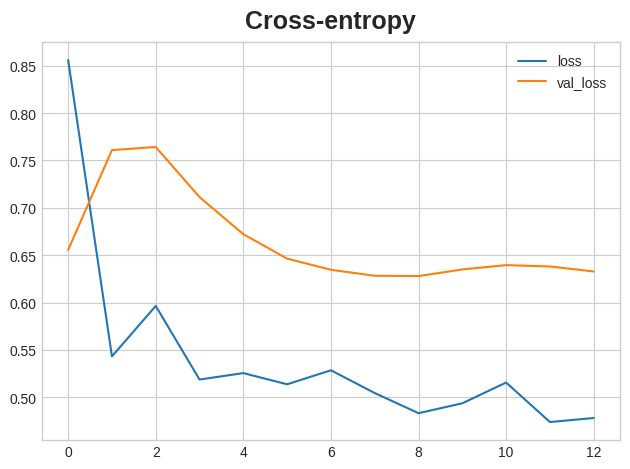

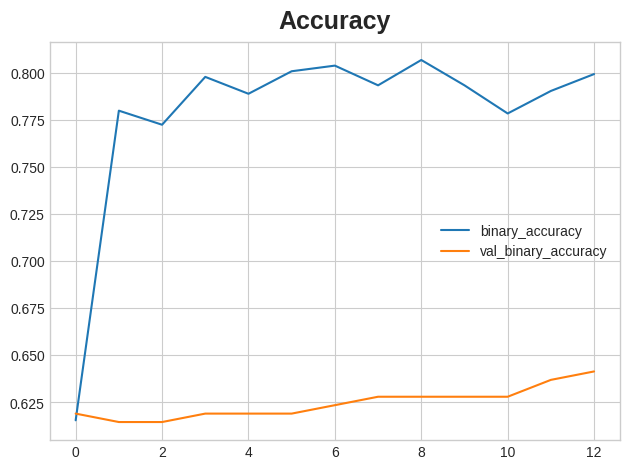

In [17]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

In [18]:
history_df.head(10)

,binary_accuracy,loss,val_binary_accuracy,val_loss
0,0.615269,0.856020,0.618834,0.655485
1,0.779940,0.543163,0.614350,0.760874
2,0.772455,0.596402,0.614350,0.764215
3,0.797904,0.518725,0.618834,0.711307
4,0.788922,0.525517,0.618834,0.672164
5,0.800898,0.513706,0.618834,0.646323
6,0.803892,0.528499,0.623318,0.634571
7,0.793413,0.504475,0.627803,0.628277
8,0.806886,0.483209,0.627803,0.627933
9,0.793413,0.493662,0.627803,0.634945


In [19]:
#now to get the confusion matrix of the model
predictions = model.predict(X_valid)
valid_df = X_valid
valid_df['Survived_Actual'] = y_valid.to_numpy()
valid_df['Survived_Predicted'] = predictions
valid_df.head(10)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


,Age,Sex_0,Sex_1,Pclass_1,Pclass_2,Pclass_3,Survived_Actual,Survived_Predicted
823,27.00,1.0,0.0,0.0,0.0,1.0,1,0.366598
574,16.00,0.0,1.0,0.0,0.0,1.0,0,0.333260
533,28.00,1.0,0.0,0.0,0.0,1.0,1,0.361346
281,28.00,0.0,1.0,0.0,0.0,1.0,0,0.268855
305,0.92,0.0,1.0,1.0,0.0,0.0,1,0.446831
114,17.00,1.0,0.0,0.0,0.0,1.0,0,0.417862
801,31.00,1.0,0.0,0.0,1.0,0.0,1,0.352836
76,28.00,0.0,1.0,0.0,0.0,1.0,0,0.268855
821,27.00,0.0,1.0,0.0,0.0,1.0,1,0.274107
636,32.00,0.0,1.0,0.0,0.0,1.0,0,0.247715


In [20]:
#get the optimal binary cutoff for the predicted survival probability
valid_df['Survived_Actual'].describe()

count    223.000000
mean       0.385650
std        0.487844
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived_Actual, dtype: float64

In [30]:
#create the binary prediction of survival, where the cutoff is the proportion of passengers who survived
valid_df['Survived_Decision'] = np.where(valid_df['Survived_Actual'] > 0.3857, 1, 0)
valid_df.head(10)


,Age,Sex_0,Sex_1,Pclass_1,Pclass_2,Pclass_3,Survived_Actual,Survived_Predicted,Survived_Decision
823,27.00,1.0,0.0,0.0,0.0,1.0,1,0.366598,1
574,16.00,0.0,1.0,0.0,0.0,1.0,0,0.333260,0
533,28.00,1.0,0.0,0.0,0.0,1.0,1,0.361346,1
281,28.00,0.0,1.0,0.0,0.0,1.0,0,0.268855,0
305,0.92,0.0,1.0,1.0,0.0,0.0,1,0.446831,1
114,17.00,1.0,0.0,0.0,0.0,1.0,0,0.417862,0
801,31.00,1.0,0.0,0.0,1.0,0.0,1,0.352836,1
76,28.00,0.0,1.0,0.0,0.0,1.0,0,0.268855,0
821,27.00,0.0,1.0,0.0,0.0,1.0,1,0.274107,1
636,32.00,0.0,1.0,0.0,0.0,1.0,0,0.247715,0


In [31]:
#create a two-way table to compare Survived_Actual to Survied_Decision
confusion_matx = pd.crosstab(valid_df['Survived_Actual'], valid_df['Survived_Decision'])
print(confusion_matx)

Survived_Decision    0   1
Survived_Actual           
0                  137   0
1                    0  86


**With only three features, we have a perfect model!**